In [261]:
import pandas as pd
file = r"C:\Users\jvrdo\Downloads\tidy_table (1).csv"

df= pd.read_csv(file)


In [262]:
df


,dob,velicina_tumora,hist_tip,gradus,er,pr,her2,ki67,imunofenotip,broj_meta,neo
0,61,0.8,NOSinvazivnikarcinom,2,95.0,70,0.0,95.0,luminal_B,0,0
1,75,1.8,NOSinvazivnikarcinom,2,100.0,100,3.0,35.0,luminal_B_Hp,1,0
2,65,1.2,NOSinvazivnikarcinom,2,100.0,15,3.0,20.0,luminal_B_Hp,0,0
3,71,3.0,NOSinvazivnikarcinom,2,85.0,3,1.5,35.0,luminal_B,1,0
4,82,3.0,NOSinvazivnikarcinom,2,0.0,0,0.0,50.0,3n,1,0
...,...,...,...,...,...,...,...,...,...,...,...
8800,79,2.0,NOSinvazivnikarcinom,1,1.0,90,1.0,15.0,luminal_A,0,1
8801,80,2.9,NOSinvazivnikarcinom,2,0.0,0,1.0,50.0,3n,0,1
8802,50,1.5,NOSinvazivnikarcinom,2,1.0,60,1.0,22.0,luminal_B,0,1
8803,72,2.0,NOSinvazivnikarcinom,2,1.0,80,1.0,15.0,luminal_A,1,1


In [244]:
# Checking hist types
df["hist_tip"].value_counts()

NOSinvazivnikarcinom               7070
lobularniinvazivni                 1048
mucinozniinvazivni                  202
drugirijetkitipovi                  124
Casmedularnimkarakteristikama        69
mikropapilarniinvazivnikarcinom      68
kribriformniinvazivni                67
tubularniinvazivni                   48
Casapokrinomdiferencijacijom         45
metaplastičnikarcinom                44
mikroinvazivnikarcinom               20
Name: hist_tip, dtype: int64

All types that are <60 in occurence will be added to "drugi rijetki tipovi".

In [245]:
df['hist_tip'] = df['hist_tip'].replace(["mikroinvazivnikarcinom"],"drugirijetkitipovi")

df['hist_tip'] = df['hist_tip'].replace(["metaplastičnikarcinom"],"drugirijetkitipovi")

df['hist_tip'] = df['hist_tip'].replace(["Casapokrinomdiferencijacijom"],"drugirijetkitipovi")

df['hist_tip'] = df['hist_tip'].replace(["tubularniinvazivni"],"drugirijetkitipovi")



In [246]:
df['hist_tip'] = df['hist_tip'].replace(["kribriformniinvazivni"],"drugirijetkitipovi")

df['hist_tip'] = df['hist_tip'].replace(["mikropapilarniinvazivnikarcinom"],"drugirijetkitipovi")

df['hist_tip'] = df['hist_tip'].replace(["Casmedularnimkarakteristikama"],"drugirijetkitipovi")

<AxesSubplot:>

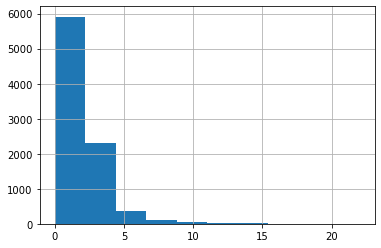

In [247]:
# Checking tumour size distribution
df["velicina_tumora"].hist()

In [248]:
# Creating a function to change some of the neoadjuvant rows that were classified as 0 metastasis to 1
def pretvorba(df):
    
        if df["velicina_tumora"]>3 and  df["neo"]==1 and df["broj_meta"]==0:
            
            return 1

In [249]:
df["neo_n"]= df.apply(lambda df: pretvorba(df), axis=1)


In [250]:
# Checking how many rows did we transform
df["neo_n"].value_counts()

1.0    75
Name: neo_n, dtype: int64

In [251]:
# Filling new nans
df["neo_n"].fillna(0, inplace=True)

In [252]:
df

,dob,velicina_tumora,hist_tip,gradus,er,pr,her2,ki67,imunofenotip,broj_meta,neo,neo_n
0,61,0.8,NOSinvazivnikarcinom,2,95.0,70,0.0,95.0,luminal_B,0,0,0.0
1,75,1.8,NOSinvazivnikarcinom,2,100.0,100,3.0,35.0,luminal_B_Hp,1,0,0.0
2,65,1.2,NOSinvazivnikarcinom,2,100.0,15,3.0,20.0,luminal_B_Hp,0,0,0.0
3,71,3.0,NOSinvazivnikarcinom,2,85.0,3,1.5,35.0,luminal_B,1,0,0.0
4,82,3.0,NOSinvazivnikarcinom,2,0.0,0,0.0,50.0,3n,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8800,79,2.0,NOSinvazivnikarcinom,1,1.0,90,1.0,15.0,luminal_A,0,1,0.0
8801,80,2.9,NOSinvazivnikarcinom,2,0.0,0,1.0,50.0,3n,0,1,0.0
8802,50,1.5,NOSinvazivnikarcinom,2,1.0,60,1.0,22.0,luminal_B,0,1,0.0
8803,72,2.0,NOSinvazivnikarcinom,2,1.0,80,1.0,15.0,luminal_A,1,1,0.0


In [253]:
# Filling our target with new variables
df["broj_meta"]= df["broj_meta"] + df["neo_n"]

In [256]:
# Checking how many neoadjuvant rows there are
df["neo"].value_counts()

0    7653
1    1152
Name: neo, dtype: int64

In [257]:
# Dropping ne "neo_n" column (because we added the needed data to broj_meta)
df_nov= df.drop("neo_n", axis=1)

In [258]:
# Checking result
df_nov

,dob,velicina_tumora,hist_tip,gradus,er,pr,her2,ki67,imunofenotip,broj_meta,neo
0,61,0.8,NOSinvazivnikarcinom,2,95.0,70,0.0,95.0,luminal_B,0.0,0
1,75,1.8,NOSinvazivnikarcinom,2,100.0,100,3.0,35.0,luminal_B_Hp,1.0,0
2,65,1.2,NOSinvazivnikarcinom,2,100.0,15,3.0,20.0,luminal_B_Hp,0.0,0
3,71,3.0,NOSinvazivnikarcinom,2,85.0,3,1.5,35.0,luminal_B,1.0,0
4,82,3.0,NOSinvazivnikarcinom,2,0.0,0,0.0,50.0,3n,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
8800,79,2.0,NOSinvazivnikarcinom,1,1.0,90,1.0,15.0,luminal_A,0.0,1
8801,80,2.9,NOSinvazivnikarcinom,2,0.0,0,1.0,50.0,3n,0.0,1
8802,50,1.5,NOSinvazivnikarcinom,2,1.0,60,1.0,22.0,luminal_B,0.0,1
8803,72,2.0,NOSinvazivnikarcinom,2,1.0,80,1.0,15.0,luminal_A,1.0,1


In [259]:
# Checking how many target values does our new df have
df_nov["broj_meta"].value_counts()

0.0    5742
1.0    3063
Name: broj_meta, dtype: int64

In [263]:
# Checking old df target values for comparison 
df["broj_meta"].value_counts()

0    5817
1    2988
Name: broj_meta, dtype: int64

In [264]:
# Creating a df that has no neodjuvants
df_ne= df[df["neo"]==0]

In [268]:
# Checking the target in no neoadj df
df_ne["broj_meta"].value_counts()

0    5314
1    2339
Name: broj_meta, dtype: int64

In [269]:
# checking the num of targets in patients with neoadjuvant
df_da= df[df["neo"]==1]

df_da["broj_meta"].value_counts()

1    649
0    503
Name: broj_meta, dtype: int64

In [270]:
# Checking original shape
df_c.shape

(8805, 10)

In [271]:
# Importing libraries
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from catboost import Pool, cv
from sklearn.metrics import roc_curve, roc_auc_score
import optuna
from sklearn.preprocessing import OrdinalEncoder

In [272]:
# Creating dummy variables for categorical columns
df_dummies = pd.get_dummies(df_nov, columns=['hist_tip',"imunofenotip"], drop_first=True)

In [307]:
# train test split after encoding categorical variables
y= df_nov["broj_meta"]
X_train, X_test, y_train, y_test = train_test_split(df_dummies.drop("broj_meta", axis=1), y, test_size = 0.15, random_state=68, stratify=y)

In [286]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier

# parameter grid
pgrid = {    
    'max_depth' : [75, 50],    
    'min_samples_split' : [2,3,10],
    'min_samples_leaf' : [1,2,10],
    'class_weight': ['balanced','balanced_subsample']
}

# specifying the cv
cv_skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

# specifying the model 
rfgs = BalancedRandomForestClassifier(n_jobs=-1)



# specify the grid search cv
cv = HalvingGridSearchCV(estimator=rfgs,param_grid=pgrid,cv=cv_skf,n_jobs=-1,verbose=10, scoring='accuracy',random_state=0)

cc= cv.fit(X_train,y_train)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 277
max_resources_: 7484
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 36
n_resources: 277
Fitting 5 folds for each of 36 candidates, totalling 180 fits
----------
iter: 1
n_candidates: 12
n_resources: 831
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 2
n_candidates: 4
n_resources: 2493
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 3
n_candidates: 2
n_resources: 7479
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [287]:
# checking best parameters
cc.best_params_

{'class_weight': 'balanced_subsample',
 'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [311]:
# Running the optimized randomforrest
clf_optimized = BalancedRandomForestClassifier(max_depth=50, min_samples_leaf=2, n_estimators=2000, min_samples_split=10, random_state=0,
                                      class_weight="balanced_subsample")
clf_optimized.fit(X_train, y_train)

BalancedRandomForestClassifier(class_weight='balanced_subsample', max_depth=50,
                               min_samples_leaf=2, min_samples_split=10,
                               n_estimators=2000, random_state=0)

In [312]:
y_pred= cc.predict_proba(X_test)
y_pred= y_pred[:,1].reshape(-1,1)

y_pred

array([[0.25027566],
       [0.31566439],
       [0.25191814],
       ...,
       [0.83598639],
       [0.18337211],
       [0.31362606]])

In [313]:
y_pred_o = clf_optimized.predict_proba(X_test)

y_pred_o= y_pred_o[:,1].reshape(-1,1)

y_pred_o

array([[0.27589173],
       [0.36219903],
       [0.2431771 ],
       ...,
       [0.7165229 ],
       [0.24450279],
       [0.35551692]])

In [314]:
roc_auc_score(y_test, y_pred)

0.8983361106902994

## XGBoost

In [292]:
# Importing XGBoost
import xgboost as xgb

# Initiating XGBoost classifier
xgc = xgb.XGBClassifier(
    tree_method="gpu_hist"
)

# Fitting the model
xgc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [293]:
# Baseline XBG predictions
y_pred_x= xgc.predict_proba(X_test)

y_pred_x= y_pred_x[:,1].reshape(-1,1)

y_pred_x

array([[0.2980141 ],
       [0.2104606 ],
       [0.7193604 ],
       ...,
       [0.04456395],
       [0.1493421 ],
       [0.34748745]], dtype=float32)

In [294]:
# Baseline XGB score
roc_auc_score(y_test, y_pred_x)

0.6962777164130257

In [295]:
# Importing Grid search 
from sklearn.model_selection import GridSearchCV

# Setting out parameter values
params = { 'max_depth': [10, 15, 30],
           'learning_rate': [0.01],
           'n_estimators': [1000],
           'colsample_bytree': [0.5, 0.4],
         'colsample_bylevel': [0.5, 0.7]}


# Initiating GridSearch CV
clf = GridSearchCV(estimator=xgc, 
                   param_grid=params,
                   cv=cv_skf,
                   scoring='roc_auc', 
                   verbose=-1)
# Fitting GridSearch to our training data
clf.fit(X_train, y_train)

C:\Users\jvrdo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jvrdo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jvrdo\anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\jvrdo\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\jvrdo\anaconda3\lib\site-packages\xgboost\core.py", line 532, in

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=0, grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constr...
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1, ...),
             param_grid={'colsample_bylevel': [0.5, 0.7],
                         'colsample_bytree': [0.5, 0.4],
                         'learning_rate': [0.01], 'max_depth': [10, 15, 30],
                         'n_estimators': [1000]},
             scoring='roc_auc', verbose=-1)

In [296]:
print("Best parameters:", clf.best_params_)

Best parameters: {'colsample_bylevel': 0.5, 'colsample_bytree': 0.4, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000}


In [308]:
# Initiating optimized version
xgc = xgb.XGBClassifier(
    tree_method="gpu_hist", colsample_bylevel=0.5, colsample_bytree=0.4, learning_rate=0.01, max_depth=10, n_estimators=1000
)

# Fitting the model
xgc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [309]:
# Optimized XBG predictions
y_pred_xo= xgc.predict_proba(X_test)

y_pred_xo= y_pred_xo[:,1].reshape(-1,1)

y_pred_xo

array([[0.14457402],
       [0.21168607],
       [0.1582005 ],
       ...,
       [0.68578655],
       [0.16101585],
       [0.20505308]], dtype=float32)

In [310]:
# Optimized XGB score
roc_auc_score(y_test, y_pred_xo)

0.7629879311215473

## Model bez neoadjuvantnih

In [82]:
df_dummies = pd.get_dummies(df_ne, columns=['hist_tip',"imunofenotip"], drop_first=True)

In [84]:
# train test split after encoding categorical variables
y= df_ne["broj_meta"]
X_train, X_test, y_train, y_test = train_test_split(df_dummies.drop("broj_meta", axis=1), y, test_size = 0.15, random_state=68, stratify=y)

In [88]:
# Importing Grid search 
from sklearn.model_selection import GridSearchCV

# Setting out parameter values
params = { 'max_depth': [10, 30],
           'learning_rate': [0.01],
           'n_estimators': [1000, 1500],
           'colsample_bytree': [0.5, 0.4],
         'colsample_bylevel': [0.5, 0.7]}


# Initiating GridSearch CV
clf = GridSearchCV(estimator=xgc, 
                   param_grid=params,
                   cv=cv_skf,
                   scoring='roc_auc', 
                   verbose=-1)
# Fitting GridSearch to our training data
clf.fit(X_train, y_train)

C:\Users\jvrdo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jvrdo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jvrdo\anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\jvrdo\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\jvrdo\anaconda3\lib\site-packages\xgboost\core.py", line 532, in

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=0.5,
                                     colsample_bynode=1, colsample_bytree=0.4,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=0, grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_co...
                                     max_depth=10, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=1000, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1, ...),
             param_grid={'colsample_bylevel': [0.5, 0.7],
                         'colsample_bytree': [0.5, 0.4],
                         'learning_rate': [0.01], 'max_depth': [10, 30],
                         'n_estimators': [1000, 1500]},
             scoring='roc_auc', verbose=-1)

In [89]:
print("Best parameters:", clf.best_params_)

Best parameters: {'colsample_bylevel': 0.5, 'colsample_bytree': 0.4, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000}


In [100]:
# Initiating optimized version
xgc = xgb.XGBClassifier(
    tree_method="gpu_hist", colsample_bylevel=0.5, colsample_bytree=0.4, learning_rate=0.01, max_depth=5, n_estimators=2000
)

# Fitting the model
xgc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=2000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [101]:
# Optimized XBG predictions
y_pred_xn= xgc.predict_proba(X_test)

y_pred_xn= y_pred_xn[:,1].reshape(-1,1)

y_pred_xn

array([[0.20508575],
       [0.07659256],
       [0.39953434],
       ...,
       [0.27764517],
       [0.14886056],
       [0.0887237 ]], dtype=float32)

In [102]:
# Optimized XGB score
roc_auc_score(y_test, y_pred_xn)

0.7115590158250132